# Week 6 Assignment - Machine Learning CSU44061
### Ernests Kuznecovs
### 17332791


### (i) 

Creating dummy features and dummy outputs (-1,0), (0,1), (1,0)

In [1]:
# id:5-25-25 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
np.seterr(divide='ignore', invalid='ignore')

X_dummy = np.array([-1,0,1]).reshape(-1, 1)
y_dummy = np.array([0,1,0])

##### (a) 

Data to be plotted and predicted is generated, x values from -3, 3 in steps of 0.1 to create enough points for a smooth plot. 

A function is created to create an instance of kNN regressor with a gaussian kernel and is created with m=3 in order for the kNN to consider all 3 data points available. The function takes in a parameter gamma, which is used in the gaussian kernel, this controls the "importance" of a training points distance from an input point.

If gamma is big, the faster the impactfulness of proximity goes down.

If gamma is small, then the weight goes down slower.

The function fits the resulting kNN model to the dummy data and then uses the plotting data to predict outputs for it.

In [2]:
X_plot = np.arange(-3, 3, 0.1).reshape(-1, 1)

def kNN_dummy_plot(gamma):
    def gaus_kern(distances):
        weights = np.exp(-gamma*(distances**2))
        return weights/np.sum(weights)

    m = 3
    model = KNeighborsRegressor(n_neighbors=m, weights=gaus_kern).fit(X_dummy, y_dummy)
    return model.predict(X_plot)

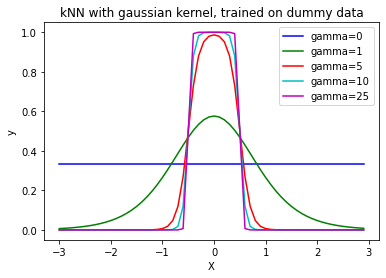

In [3]:
plt.plot(X_plot, kNN_dummy_plot(0), 'b-', label='gamma=0')
plt.plot(X_plot, kNN_dummy_plot(1), 'g-', label='gamma=1')
plt.plot(X_plot, kNN_dummy_plot(5), 'r-', label='gamma=5')
plt.plot(X_plot, kNN_dummy_plot(10), 'c-', label='gamma=10')
plt.plot(X_plot, kNN_dummy_plot(25), 'm-', label='gamma=25')
plt.title("kNN with gaussian kernel, trained on dummy data")
plt.xlabel("X") ; plt.ylabel("y")
plt.legend()

#### (b)

At gamma = 0, this has the effect of linear weights, therefore, we see that for every input point, it just returns the average of all the training data since m=3 and there are 3 training points, where m is number of neighbours being considered.

At gamma=1, gamma seems to relatively quite low, and therefore considering far away points quite a lot. We can see how much the prediction is influenced by looking at x=0, where there exists exactly a training point on x=0 which gives y=1. But the training points 1 unit away on either side of x=0 influences the prediction a lot and therefore is predicting around 0.55.

As gamma is increasing we can see that at x = 1 is becoming more and more correct as its considering it's neighbours less, and then at gamma = 25, we can see a very sharp decision point indicating that there is effectively no influence by other further away points until a certian boundary.

#### (c)

A function is created that takes gamma, and, C. This function creates a kernalised ridge regression model and is fit to the dummy data, prints its resulting parameters, and outputs the predictions for the plot data.

In [4]:
def kernel_dummy_plot(gamma=5, C=20):
    model = KernelRidge(alpha=1.0/(2*C), kernel='rbf', gamma=gamma).fit(X_dummy, y_dummy)
    ratio = model.dual_coef_[0] / model.dual_coef_[1]
    print("gamma:", gamma, "C:", C, "   \nparams:", model.dual_coef_, "\nratio:", model.dual_coef_[0])
    print()
    return model.predict(X_plot)

First gamma is varied at C=20.

gamma: 0 C: 20    
params: [-13.2231405  26.7768595 -13.2231405] 
ratio: -13.223140495867863

gamma: 1 C: 20    
params: [-0.46058165  1.3062215  -0.46058165] 
ratio: -0.4605816473622853

gamma: 5 C: 20    
params: [-0.00641383  0.97569408 -0.00641383] 
ratio: -0.006413829254329942

gamma: 10 C: 20    
params: [-4.32123069e-05  9.75609760e-01 -4.32123069e-05] 
ratio: -4.321230690362335e-05

gamma: 25 C: 20    
params: [-1.32187449e-11  9.75609756e-01 -1.32187449e-11] 
ratio: -1.3218744904189437e-11



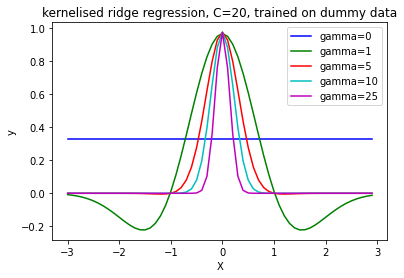

In [5]:
plt.plot(X_plot, kernel_dummy_plot(gamma=0), 'b-', label='gamma=0')
plt.plot(X_plot, kernel_dummy_plot(gamma=1), 'g-', label='gamma=1')
plt.plot(X_plot, kernel_dummy_plot(gamma=5), 'r-', label='gamma=5')
plt.plot(X_plot, kernel_dummy_plot(gamma=10), 'c-', label='gamma=10')
plt.plot(X_plot, kernel_dummy_plot(gamma=25), 'm-', label='gamma=25')
plt.title("kernelised ridge regression, C=20, trained on dummy data")
plt.xlabel("X") ; plt.ylabel("y")
plt.legend()

Then C is varied at gamma=5.

gamma: 5 C: 0.1    
params: [-0.00018717  0.16666709 -0.00018717] 
ratio: -0.00018716566642741733

gamma: 5 C: 1    
params: [-0.00299476  0.66669357 -0.00299476] 
ratio: -0.002994763961766002

gamma: 5 C: 1000    
params: [-0.00673182  0.99959092 -0.00673182] 
ratio: -0.006731824726260251



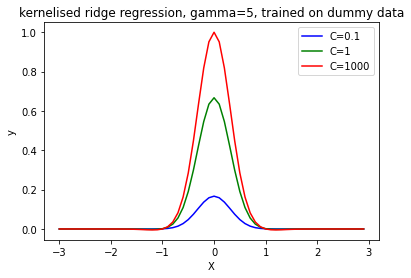

In [6]:
plt.plot(X_plot, kernel_dummy_plot(C=0.1), 'b-', label='C=0.1')
plt.plot(X_plot, kernel_dummy_plot(C=1), 'g-', label='C=1')
plt.plot(X_plot, kernel_dummy_plot(C=1000), 'r-', label='C=1000')
plt.title("kernelised ridge regression, gamma=5, trained on dummy data")
plt.xlabel("X") ; plt.ylabel("y")
plt.legend()

#### (d)

Each feature in a kernalised ridge regression corresponds to a training data point that its been trained on. Therefore there are as many parameters as training points.   

y = theta1 y1 K(x1, x) + thet2 y2 K(x2, x) + theta3 y3 K(x3, x)

K(xi, x) should be about 1 when distance between xi and x is small, falling to 0 as distance grows.

Similarly to the gaussian kernel of kNN, K(xi, x) relies on gamma, which controls how quickly the weight falls to 0 as distance between the input and training point increases.

By observing the coefficients we see that they sort of map directly to the y values of the training data, eg gamma:1 C:20 params:[-0.46058165  1.3062215  -0.46058165]

Having lower values if output y should be 0 and higher values if output y should be 1. The parameters that correspond to the y=0 data points are exactly the same.

When gamma is increasing, the changes in prediction is sharp (as in quick to change), and will take into account the closest points the most, this is reflected in the graph by the narrowing of the curve when predicting for the input x=0 as (0,1) is a training point.  

This is also reflected in the parameter values. As gamma increases, the ratio between the parameters increases, meaning that when given an input, if the input is close to a feature, the features relatively huge impact will is expressed (since the ratio between points are large).

When gamma is 0, all the parameters will have an equal weight for any input point. Since the model basically has linear features, the model will tend toward the average of all the points if there is no cost to having a model have numbers that allow it to tend towards the average. 

We can see how the cost hyperparameter C affects the model. Since the penaly discourages the model to have big parameter values, the parameter values cannot grow to reach the y value of +1. since the penalty is alpha = 1/2*C, when C is tiny it, the penalty is keeping the model at low output values. 

We can also see that the ratio is staying roughly the same, but there is a slight deviation as the huge penalty is not letting the model to fit properly.

#### (ii)

The data is read in and plotted just to get a feel for it.

Features head: [[-0.53]
 [-0.51]
 [-0.9 ]
 [ 0.6 ]
 [-0.69]]
Target head: [-1.39869827 -1.2322877  -0.50725455  4.78002656 -0.4198343 ]


Text(0, 0.5, 'y')

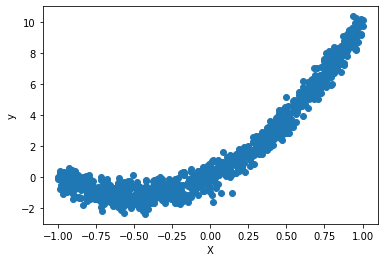

In [7]:
# id:5-25-25 
df = pd.read_csv("week6.csv", comment='#')
xy = df.to_numpy()

X = xy[:, 0].reshape(-1, 1)
y = xy[:, 1]

print("Features head:", X[:5])
print("Target head:", y[:5])

plt.scatter(X, y)
plt.xlabel("X") ; plt.ylabel("y")

#### (a) 

A function is defined that creates a kNN with a gaussian kernal with argument gamma and fits to the training data and returns the predicitons of the generated plot values.

In [8]:
X_plot = np.arange(-3, 3, 0.01).reshape(-1, 1)

def kNN_plot(gamma):
    def gaus_kern(distances):
        weights = np.exp(-gamma*(distances**2))
        return weights/np.sum(weights)

    m = X.shape[0] # number of training points
    model = KNeighborsRegressor(n_neighbors=m, weights=gaus_kern).fit(X, y)
    return model.predict(X_plot)

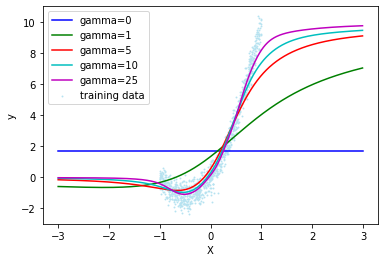

In [9]:
plt.plot(X_plot, kNN_plot(0), 'b-', label='gamma=0')
plt.plot(X_plot, kNN_plot(1), 'g-', label='gamma=1')
plt.plot(X_plot, kNN_plot(5), 'r-', label='gamma=5')
plt.plot(X_plot, kNN_plot(10), 'c-', label='gamma=10')
plt.plot(X_plot, kNN_plot(25), 'm-', label='gamma=25')
plt.scatter(X, y, s=0.8, c='#b6e2f0', label='training data')
plt.xlabel("X") ; plt.ylabel("y")
plt.legend()

As gamma increases, it takes less account of points far away and looks at its closes neighbourhood.   
   
Whem gamma=0, since m= number of data points, it taking the average of the whole dataset, since it considers every point equal.   
   
Whem gamma is large it looks at the local points around it and gives them more weight.     
   
Since kNN distance only affects which point to consider more, it stays at the same y as x extends pass the training points. sum(wi * yi) / sum(yi) where wi is the weight of training point i and yi is the output value of training point yi. Since it the formula divides by sum(yi) it is just choosing which y point to "copy" the most.

#### (b)

A function that takes gamma and C as argument and returns the predicted plot data on the model that is fitted with the training data is created.

In [10]:
def kernel_plot(gamma=5, C=20):
    model = KernelRidge(alpha=1.0/(2*C), kernel='rbf', gamma=gamma).fit(X, y)
    return model.predict(X_plot)

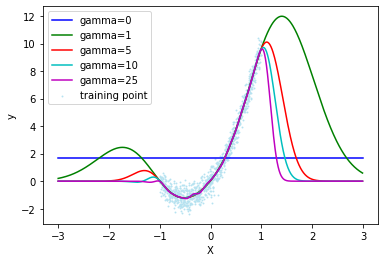

In [11]:
plt.plot(X_plot, kernel_plot(gamma=0), 'b-', label='gamma=0')
plt.plot(X_plot, kernel_plot(gamma=1), 'g-', label='gamma=1')
plt.plot(X_plot, kernel_plot(gamma=5), 'r-', label='gamma=5')
plt.plot(X_plot, kernel_plot(gamma=10), 'c-', label='gamma=10')
plt.plot(X_plot, kernel_plot(gamma=25), 'm-', label='gamma=25')
plt.scatter(X, y, s=0.8, c='#b6e2f0', label='training point')
plt.xlabel("X") ; plt.ylabel("y")
plt.legend()

When gamma=0 its tending towards the average of the training set, as all the features are of equal weight since the weight is constantly 1 due to gamma being 0.   
   
When gamma=1 we can see that it has "recorded" the linearity of the pervious points, since its taking in account a relatively large number of points since the gamma doesn't cause the weighting of the distance to fall down fast.   
   
We can see how it extends the "trend" better than the rest of the gammas.     
   
When gamma is big, and when the x values go past the training points, the weighting of the distances causes the parameters to have less and less effect on the output, therefore the high gammas are falling off faster, since they rely on points being close.

#### (c)

A function for declaring a KernelRidge model and a function for creating a kNN model is created with appropriate arugments for varying in kFold.   
   
A third function is created that takes in a model and calculates an error value for each run of a kFold and then return the mean, and standard deviation of the collected errors for that model.

In [12]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

def kernel_model(gamma=5, C=20):
    return KernelRidge(alpha=1.0/(2*C), kernel='rbf', gamma=gamma)
    
def kNN_model(gamma, m):
    def gaus_kern(distances):
        weights = np.exp(-gamma*(distances**2))
        return weights/np.sum(weights)
    return KNeighborsRegressor(n_neighbors=m, weights=gaus_kern)


def kfoldMeanVar(splits, model):
    kf = KFold(n_splits=splits)
    meanSquareErrors = []
    
    for train, test in kf.split(X):
        model = model.fit(X[train], y[train])
        ypred = model.predict(X[test])
        mse = mean_squared_error(y[test],ypred)
        meanSquareErrors.append(mse)
                
    return np.mean(meanSquareErrors), np.var(meanSquareErrors), np.std(meanSquareErrors)

Varying gamma on kNN.

Text(0.5, 1.0, '10 fold kNN gaussian kernel ; std error bars')

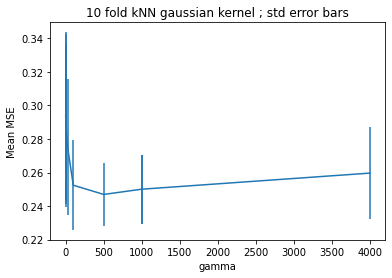

In [13]:
gammas = [0, 1, 5, 10, 25, 100, 500, 1000, 1000, 4000]
meanMSE = []
stdMSE = []
folds = 10

for gamma in gammas:
    model = kNN_model(gamma, int(X.shape[0] / folds))
    mean, var, std = kfoldMeanVar(folds, model)
    meanMSE.append(mean)
    stdMSE.append(std)

plt.errorbar(gammas, meanMSE, stdMSE)
plt.xlabel("gamma") ; plt.ylabel("Mean MSE")
plt.title("10 fold kNN gaussian kernel ; std error bars")

A gamma value of 500 will be selected as it is at the lowest error.

Varying gamma on ridge regression.

Text(0.5, 1.0, '10 fold kernel ridge regression c=20 ; std error bars')

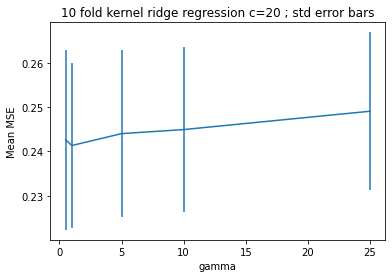

In [14]:
gammas = [0.5, 1, 5, 10, 25]
meanMSE = []
stdMSE = []
folds = 10

for gamma in gammas:
    model = kernel_model(gamma=gamma)
    mean, var, std = kfoldMeanVar(folds, model)
    meanMSE.append(mean)
    stdMSE.append(std)

plt.errorbar(gammas, meanMSE, stdMSE)
plt.xlabel("gamma") ; plt.ylabel("Mean MSE")
plt.title("10 fold kernel ridge regression c=20 ; std error bars")

A gamma value of 1 will be selected as its at a minimal error with relatively OK std error.

C values are cross validated with a constant gamma value of 1.

Varying C on ridge regression.

Text(0.5, 1.0, '10 fold kernel ridge regression gamma=1 ; std error bars')

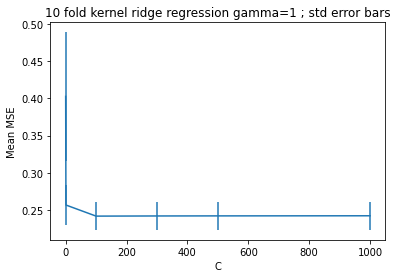

In [15]:
Cs = [0.1, 1, 100, 300, 500, 1000]
meanMSE = []
stdMSE = []
folds = 10

for C in Cs:
    model = kernel_model(gamma=1, C=C)
    mean, var, std = kfoldMeanVar(folds, model)
    meanMSE.append(mean)
    stdMSE.append(std)

plt.errorbar(Cs, meanMSE, stdMSE)
plt.xlabel("C") ; plt.ylabel("Mean MSE")
plt.title("10 fold kernel ridge regression gamma=1 ; std error bars")

From the graph, it seems like C=100 is a reasonable variable to use for the penalty function, as it keeps the parameters maximally normalised while not affecting the error.

Optimal models are created and plotted against each other.

In [16]:
kernel_ridge = kernel_model(gamma=1, C=100).fit(X, y)
kNN = kNN_model(gamma=500, m=X.shape[0]).fit(X, y)

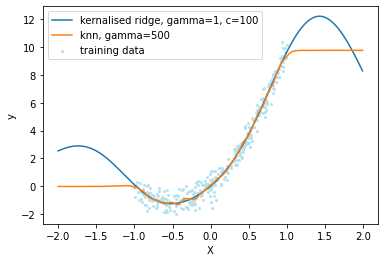

In [17]:
X_plot = np.arange(-2, 2, 0.01).reshape(-1, 1)

plt.plot(X_plot, kernel_ridge.predict(X_plot), label='kernalised ridge, gamma=1, c=100')
plt.plot(X_plot, kNN.predict(X_plot), label='knn, gamma=500')
plt.scatter(X_test, y_test,s=4, c='#b6e2f0', label='training data')
plt.xlabel("X") ; plt.ylabel("y")
plt.legend()

We can see that the models fit almost identically when there data points present, although kNN is a little bit wobbly, cause of the large gamma, but still fits alright.   
   
The biggest difference is that the kernalised linear model is able fit to a trend and extend farther than the kNN. This is as the linear model still uses a form of linear regression.   
   
Since kNN's way of predicting keeps taking into account the same points, with the same ratio of weighting, its y value stays the same when x goes away from the training data.